# LocalCart scenario part 5: Build a product recommendation engine

In this notebook, you'll first load historical shopping data. Then you'll structure and view that data in a table that displays customer information, product categories, and shopping history details. You will use the _k_-means algorithm, which is useful for cluster analysis in data mining, to segment customers into clusters for the purpose of making an in-store purchase recommendation based on shopping history. You’ll deploy the model to the IBM Watson Machine Learning service in IBM Bluemix to create your recommendation application. By the end of the notebook, you’ll understand how to build a model to provide product recommendations for customers based on their purchase history.

<img src="https://raw.githubusercontent.com/wdp-beta/get-started/master/notebooks/images/nb5_flow.png"></img>

This notebook runs on Python 2 with Spark 2.0.

## Table of contents

1. [Setup](#setup)<br>
    1.1. [Import libraries](#libraries)<br>
    1.2. [Load sample data](#load)<br>
    1.3. [View data in a table](#view_table)<br>
2. [Create a KMeans model](#kmeans)<br>
    2.1. [Prepare data](#prepare_data)<br>
    2.2. [Create clusters and define the model](#build_model)<br>
3. [Persist the model](#persist)<br>	
4. [Deploy the model to the cloud](#deploy)<br>
	4.1. [Create deployment for the model](#create_deploy)<br>
	4.2. [Test model deployment](#test_deploy)<br>
5. [Create product recommendations](#create_recomm)<br>
	5.1. [Test product recommendations model](#test_recomm)<br>
6. [Summary and next steps](#summary)<br>

<a id="setup"></a>
## 1. Setup

You need to import the required library and load the customer shopping data into this notebook.

Import the PixieDust library:

In [1]:
import pixiedust

Pixiedust database opened successfully


/usr/local/src/bluemix_jupyter_bundle.v56/notebook/lib/python2.7/site-packages/bokeh/core/json_encoder.py:52: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  NP_EPOCH = np.datetime64('1970-01-01T00:00:00Z')


In [2]:
# If the previous cell caused an error:
# (1) Uncomment the last line in this cell by removing the # sign
# (2) Run this cell
# (3) Restart the kernel
# (4) Re-run the first cell 
!pip install --user --upgrade pixiedust

    100% |████████████████████████████████| 133kB 2.2MB/s ta 0:00:01
    100% |████████████████████████████████| 798kB 335kB/s ta 0:00:01
    100% |████████████████████████████████| 6.8MB 171kB/s eta 0:00:01
  Running setup.py bdist_wheel for pixiedust ... done
  Stored in directory: /gpfs/fs01/user/s432-d1f89c5e838dca-563e907592cb/.cache/pip/wheels/66/e6/68/abf37aa4bd0e651942314035cdc80cbb21d35154b34ee4a76c
  Running setup.py bdist_wheel for mpld3 ... done
  Stored in directory: /gpfs/fs01/user/s432-d1f89c5e838dca-563e907592cb/.cache/pip/wheels/69/bc/68/7ca3b696749d183e998968fc24b0ff3c5e119d9e68bf495b07
Successfully built pixiedust mpld3


<a id="load"></a>
### 1.1. Load sample data

In this section you'll load the data file that contains the customer shopping data:

In [3]:
df = pixiedust.sampleData("https://raw.githubusercontent.com/wdp-beta/get-started/master/data/customers_orders1_opt.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Creating pySpark DataFrame for 'https://raw.githubusercontent.com/wdp-beta/get-started/master/data/customers_orders1_opt.csv'. Please wait...
Successfully created pySpark DataFrame for 'https://raw.githubusercontent.com/wdp-beta/get-started/master/data/customers_orders1_opt.csv'


<a id="view_table"></a>
### 1.3. View data in a table by using Pixiedust

To better examine and visualize the data, run the following cell to view it in a table format:

In [4]:
display(df)

CUSTNAME,GenderCode,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,ADDRESS2,EMAIL_ADDRESS,PHONE_NUMBER,CREDITCARD_TYPE,LOCALITY,SALESMAN_ID,NATIONALITY,NATIONAL_ID,CREDITCARD_NUMBER,DRIVER_LICENSE,CUST_ID,ORDER_ID,ORDER_DATE,ORDER_TIME,FREIGHT_CHARGES,ORDER_SALESMAN,ORDER_POSTED_DATE,ORDER_SHIP_DATE,AGE,ORDER_VALUE,T_TYPE,PURCHASE_TOUCHPOINT,PURCHASE_STATUS,ORDER_TYPE,GENERATION,Baby Food,Diapers,Formula,Lotion,Baby wash,Wipes,Fresh Fruits,Fresh Vegetables,Beer,Wine,Club Soda,Sports Drink,Chips,Popcorn,Oatmeal,Medicines,Canned Foods,Cigarettes,Cheese,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,None,Allen.M.Perl@spambob.com,0370 4762239,Master Card,None,RP385,U.S.,22867928,5179762243750832,None,10003,1106,2016-06-23 00:00:00,2016-06-23 15:29:06.250000,29.79,NC298,2016-07-15 00:00:00,27/07/2016,27,134.24,Complete,Phone,Frequent,MediumValue,Gen_Y,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,None,Allen.M.Perl@spambob.com,0370 4762239,Master Card,None,RP385,U.S.,22867928,5151795581583086,None,10003,2948,2016-01-08 00:00:00,2016-01-08 03:13:54.564000,17.87,SW277,2016-02-20 00:00:00,27/03/2016,27,53.4,Abandoned,Phone,Frequent,MediumValue,Gen_Y,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,None,Allen.M.Perl@spambob.com,0370 4762239,Master Card,None,RP385,U.S.,22867928,5172170955593514,None,10003,3323,2016-08-25 00:00:00,2016-08-25 16:39:06.250000,31.88,NC160,2016-09-19 00:00:00,27/09/2016,27,26.25,Complete,Desktop,Frequent,LowValue,Gen_Y,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,None,Allen.M.Perl@spambob.com,0370 4762239,Master Card,None,RP385,U.S.,22867928,5159253292458638,None,10003,7498,2016-10-22 00:00:00,2016-10-22 08:19:56.145000,18.45,SW409,2016-12-23 00:00:00,03/01/2016,27,5.65,Complete,Phone,Frequent,LowValue,Gen_Y,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,None,Allen.M.Perl@spambob.com,0370 4762239,Master Card,None,RP385,U.S.,22867928,5139426156817496,None,10003,7973,2016-04-06 00:00:00,2016-04-06 13:07:36.370000,23.12,WE352,2016-04-20 00:00:00,01/04/2016,27,44.43,Complete,Phone,Frequent,LowValue,Gen_Y,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,None,Allen.M.Perl@spambob.com,0370 4762239,Master Card,None,RP385,U.S.,22867928,5121842087536759,None,10003,9107,2016-02-06 00:00:00,2016-02-06 13:07:36.370000,22.77,NW379,2016-02-20 00:00:00,01/03/2016,27,24.18,Complete,Phone,Frequent,LowValue,Gen_Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Anthony Whitney,Mr.,518 Highland View Drive,Achstetten,None,DE,88480,0,None,Anthony.H.Whitney@pookmail.com,03571 39 94 30,VISA,None,WE349,IT,NXFXLA90D69D741G,4469933134773785,None,10007,7441,2016-01-20 00:00:00,2016-01-20 22:39:06.250000,11.05,SC130,2016-02-10 00:00:00,27/02/2016,NA,9999999.0,Complete,Desktop,FirstTime,HighValue,Gen_Z,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
Thomas Owens,Mr.,4030 Jessie Street,Adami,CZ,IT,88041,0,None,Thomas.N.Owens@mailinator.com,0341 5536286,VISA,None,WE352,FR,1.48E+14,4662808713742937,None,10015,627,2016-03-16 17:47:25,2016-03-16 17:47:25.375000,6.37,NC163,2016-03-16 17:47:25,05/08/2016,60,40.34,Complete,Phone,Occasional,LowValue,Baby_Boomers,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Thomas Owens,Mr.,4030 Jessie Street,Adami,CZ,IT,88041,0,None,Thomas.N.Owens@mailinator.com,0341 5536286,VISA,None,WE352,FR,1.48E+14,4016647581929587,None,10015,1209,2016-01-20 00:00:00,2016-01-20 20:43:54.564000,23.37,SW340,2016-02-10 00:00:00,27/02/2016,60,18.81,Cancelled,Phone,Occasional,LowValue,Baby_Boomers,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<a id="kmeans"></a>
## 2. Create a _k_-means model

In this section of the notebook you'll use the _k_-means implementation to associate every customer to a cluster based on their shopping history.

First, import the Apache® Spark machine learning packages that you'll need in the subsequent steps:


In [5]:
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.clustering import KMeansModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors

<a id="prepare_data"></a>
### 2.1. Prepare data

Create a new data set with just the data that you need. Filter the columns that you want, in this case the customer ID column and the product-related columns. Remove the columns that you don't need for aggregating the data and training the model:

In [6]:
# Here are the product cols. In a real world scenario we would query a product table, or similar.
product_cols = ['Baby Food', 'Diapers', 'Formula', 'Lotion', 'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer', 'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal', 'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese', 'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items', 'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food', 'Spices']
# Here we get the customer ID and the products they purchased
df_filtered = df.select(['CUST_ID'] + product_cols)

Run the `display()` command again, this time to view the filtered information:


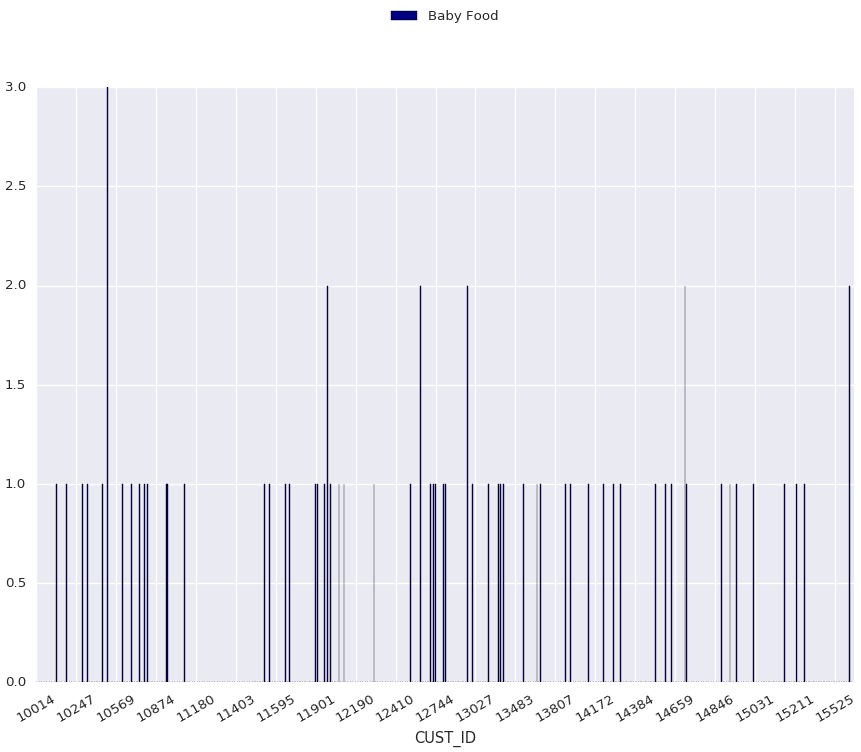

In [7]:
display(df_filtered)

Now, aggregate the individual transactions for each customer to get a single score per product, per customer.

In [8]:
df_customer_products = df_filtered.groupby('CUST_ID').sum()  # Use customer IDs to group transactions by customer and sum them up
df_customer_products = df_customer_products.drop('sum(CUST_ID)')
display(df_customer_products)

CUST_ID,sum(Baby Food),sum(Diapers),sum(Formula),sum(Lotion),sum(Baby wash),sum(Wipes),sum(Fresh Fruits),sum(Fresh Vegetables),sum(Beer),sum(Wine),sum(Club Soda),sum(Sports Drink),sum(Chips),sum(Popcorn),sum(Oatmeal),sum(Medicines),sum(Canned Foods),sum(Cigarettes),sum(Cheese),sum(Cleaning Products),sum(Condiments),sum(Frozen Foods),sum(Kitchen Items),sum(Meat),sum(Office Supplies),sum(Personal Care),sum(Pet Supplies),sum(Sea Food),sum(Spices)
12027,0,1,0,0,1,0,0,0,1,3,0,0,0,0,0,3,0,0,3,0,0,1,1,0,0,0,0,1,2
11748,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
12940,2,0,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0
10817,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
11033,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11317,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
13285,0,0,1,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13289,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,3,1,1,0,0,1,2,1,2,0,1,4
10362,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
11458,0,1,1,1,0,1,0,0,1,2,3,0,2,2,0,1,2,3,3,0,2,0,0,0,0,0,0,2,3


<a id="build_model"></a>
### 2.2. Create clusters and define the model 

You'll use _k_-means to create 100 clusters based on the number of times a specific customer purchased a product.

First, create a feature vector by combining the product and quantity columns:

In [9]:
assembler = VectorAssembler(inputCols=["sum({})".format(x) for x in product_cols],outputCol="features") # Assemble vectors using product fields

Next, create the _k_-means clusters and the pipeline to define the model:

In [10]:
kmeans = KMeans(maxIter=50, predictionCol="cluster").setK(100).setSeed(1)  # Initialize model
pipeline = Pipeline(stages=[assembler, kmeans])
model = pipeline.fit(df_customer_products)

Finally, calculate the cluster for each customer by running the original dataset against the _k_-means model: 

In [11]:
df_customer_products_cluster = model.transform(df_customer_products)
display(df_customer_products_cluster)

CUST_ID,sum(Baby Food),sum(Diapers),sum(Formula),sum(Lotion),sum(Baby wash),sum(Wipes),sum(Fresh Fruits),sum(Fresh Vegetables),sum(Beer),sum(Wine),sum(Club Soda),sum(Sports Drink),sum(Chips),sum(Popcorn),sum(Oatmeal),sum(Medicines),sum(Canned Foods),sum(Cigarettes),sum(Cheese),sum(Cleaning Products),sum(Condiments),sum(Frozen Foods),sum(Kitchen Items),sum(Meat),sum(Office Supplies),sum(Personal Care),sum(Pet Supplies),sum(Sea Food),sum(Spices),features,cluster
12027,0,1,0,0,1,0,0,0,1,3,0,0,0,0,0,3,0,0,3,0,0,1,1,0,0,0,0,1,2,"(29,[1,4,8,9,15,18,21,22,27,28],[1.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0])",30
11748,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,"(29,[10,20,24],[1.0,1.0,1.0])",41
12940,2,0,1,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,"(29,[0,2,3,5,6,9,13,15,17,18,24],[2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])",96
10817,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,"(29,[9,15,17,28],[1.0,1.0,1.0,1.0])",64
11033,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(29,[5,10],[1.0,1.0])",41
11317,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,"(29,[10,11,12,13,16,20],[1.0,1.0,1.0,1.0,1.0,1.0])",66
13285,0,0,1,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"(29,[2,7,10,13],[1.0,1.0,2.0,1.0])",73
13289,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,3,1,1,0,0,1,2,1,2,0,1,4,"(29,[2,4,6,9,14,15,17,18,19,22,23,24,25,27,28],[1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,4.0])",83
10362,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,"(29,[10,13,19,22],[1.0,1.0,1.0,1.0])",73
11458,0,1,1,1,0,1,0,0,1,2,3,0,2,2,0,1,2,3,3,0,2,0,0,0,0,0,0,2,3,"(29,[1,2,3,5,8,9,10,12,13,15,16,17,18,20,27,28],[1.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,1.0,2.0,3.0,3.0,2.0,2.0,3.0])",48


<a id="persist"></a>
## 3. Persist the model 

In this section you will learn how to store your model in the Watson Machine Learning repository by using the Python client libraries.

### 3.1 Import the necessary libraries

First, you must import the client libraries.

In [12]:
from repository.mlrepositoryclient import MLRepositoryClient
from repository.mlrepositoryartifact import MLRepositoryArtifact

### 3.2. Configure IBM Watson Machine Learning credentials
To access your machine learning repository programmatically, you need to copy in your credentials, which you can see in your **IBM Watson Machine Learning** service details in Bluemix.

1. Open your <a target="_blank" href="https://apsportal.ibm.com/settings/services?context=analytics">Bluemix Data Services list</a>. A list of your provisioned services is displayed.
1. Locate the pre-provisioned **IBM Watson Machine Learning** service and click on the service instance name.
1. Open the _Service Credentials_ tab and view the credentials.
1. Copy your credentials and paste them into the `username`, `password` and `instance_id` fields in the next cell.
1. Run the cell.


In [13]:
service_path = 'https://ibm-watson-ml.mybluemix.net'
username = 'ef4a222e-a54b-438f-82f0-e339e405a60d'
password = 'ca283748-4311-4cb1-a045-ce3b8ec8313f'
instance_id = '06279147-6347-4774-bac2-5dc8fbdd3fb0'

### 3.3 Authorize the repository and save artifacts

Authorize the repository client by running the following code, which uses the Watson Machine Learning client libraries:

In [14]:
ml_repository_client = MLRepositoryClient(service_path)
ml_repository_client.authorize(username, password)
ml_model_name = 'Shopping History'

Save the model to your Watson Machine Learning instance:

In [15]:
data_training = df_customer_products.withColumnRenamed('CUST_ID', 'label')
model_artifact = MLRepositoryArtifact(model, training_data=data_training, name=ml_model_name)
saved_model = ml_repository_client.models.save(model_artifact)
saved_model

<a id="deploy"></a>
## 4. Deploy model to the cloud

In this section you'll learn how to deploy the model to the cloud by using the Watson Machine Learning REST API. For more information about REST APIs, see the [Watson Machine Learning API Documentation](http://watson-ml-api.mybluemix.net/).

Import the required libraries:

In [16]:
import json
import requests
import urllib3

To work with the Watson Machine Learning REST API, generate an access token:

In [17]:
headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(username, password))
url = '{}/v3/identity/token'.format(service_path)
response = requests.get(url, headers=headers)
ml_token = 'Bearer ' + json.loads(response.text).get('token')

<a id="create_deploy"></a>
### 4.1. Create deployment for the model

Now you can create a deployment for the model in Watson Machine Learning:

In [18]:
deployment_url = service_path + "/v3/wml_instances/" + instance_id + "/published_models/" + saved_model.uid + "/deployments/"
deployment_header = {'Content-Type': 'application/json', 'Authorization': ml_token}
deployment_payload = {"type": "online", "name": "Shopping List Prediction"}
deployment_response = requests.post(deployment_url, json=deployment_payload, headers=deployment_header)

Execute the following code to load the scoring endpoint for the deployment. 

In [19]:
scoring_url = json.loads(deployment_response.text).get('entity').get('scoring_url')
print scoring_url

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/06279147-6347-4774-bac2-5dc8fbdd3fb0/published_models/cd647e8e-991e-4861-b53e-7105a1951b89/deployments/60ba3344-598d-4466-bfbd-408b1d5c8996/online


<a id="test_deploy"></a>
### 4.2. Test deployment of the model

To verify that the model was successfully deployed to the cloud, you'll specify a customer ID, for example customer 12027, to predict this customer's cluster against the Watson Machine Learning deployment, and see if it matches the cluster that was previously associated this customer ID.

In [20]:
customer = df_customer_products_cluster.filter('CUST_ID = 12027').collect()
print("Previously calculated cluster = {}".format(customer[0].cluster))

Previously calculated cluster = 30


To determine the customer's cluster using Watson Machine Learning, you need to load the customer's purchase history. This function uses the local data frame to select every product field and the number of times that customer 12027 purchased a product.

In [21]:
from six import iteritems
def get_product_counts_for_customer(cust_id):
    cust = df_customer_products.filter('CUST_ID = 12027').take(1)
    fields = []
    values = []
    for row in customer:
        for product_col in product_cols:
            field = 'sum({})'.format(product_col)
            value = row[field]
            fields.append(field)
            values.append(value)
    return (fields, values)

This function takes the customer's purchase history and calls the scoring endpoint:

In [22]:
def get_cluster_from_watson_ml(fields, values):
    scoring_header = {'Content-Type': 'application/json', 'Authorization': ml_token}
    scoring_payload = {'fields': fields, 'values': [values]}
    scoring_response = requests.post(scoring_url, json=scoring_payload, headers=scoring_header)
    return json.loads(scoring_response.text)['values'][0][len(product_cols)+1]

Finally, call the functions defined above to get the product history, call the scoring endpoint, and get the cluster associated to customer 12027:

In [23]:
product_counts = get_product_counts_for_customer(12027)
fields = product_counts[0]
values = product_counts[1]
print("Cluster calculated by Watson ML = {}".format(get_cluster_from_watson_ml(fields, values)))

Cluster calculated by Watson ML = 30


### 4.3. Optional: Delete previous models

If needed, you can delete previous deployments and models that you created using this notebook. 

In [ ]:
# Uncomment this cell to delete a model that was previously created
# ml_models = ml_repository_client.models.all()
# for ml_model in ml_models:
#     if ml_model.name == ml_model_name:
#         # delete any deployments
#         deployment_header = {'Content-Type': 'application/json', 'Authorization': ml_token}
#         deployment_url = service_path + "/v2/published_models/" + ml_model.uid + "/deployments/"
#         deployment_response = requests.get(deployment_url, headers=deployment_header)
#         o = json.loads(deployment_response.text)
#         if 'resources' in o.keys():
#             for resource in o['resources']:
#                 deployment_url = service_path + "/v2/published_models/" + ml_model.uid + "/deployments/" + resource['metadata']['guid']
#                 deployment_response = requests.delete(deployment_url, headers=deployment_header)
#                 print deployment_response.text
#         # delete the model
#         ml_repository_client.models.remove(ml_model.uid)

<a id="create_recomm"></a>
## 5. Create product recommendations

Now you can create some product recommendations.

First, run this cell to create a function that queries the database and finds the most popular items for a cluster. In this case, the **df_customer_products_cluster** dataframe is the database.

In [24]:
# This function gets the most popular clusters in the cell by grouping by the cluster column
def get_popular_products_in_cluster(cluster):
    df_cluster_products = df_customer_products_cluster.filter('cluster = {}'.format(cluster))
    df_cluster_products_agg = df_cluster_products.groupby('cluster').sum()
    row = df_cluster_products_agg.rdd.collect()[0]
    items = []
    for product_col in product_cols:
        field = 'sum(sum({}))'.format(product_col)
        items.append((product_col, row[field]))
    sortedItems = sorted(items, key=lambda x: x[1], reverse=True) # Sort by score
    popular = [x for x in sortedItems if x[1] > 0]
    return popular

Now, run this cell to create a function that will calculate the recommendations based on a given cluster. This function finds the most popular products in the cluster, filters out products already purchased by the customer or currently in the customer's shopping cart, and finally produces a list of recommended products.

In [25]:
# This function takes a cluster and the quantity of every product already purchased or in the user's cart
from pyspark.sql.functions import desc
def get_recommendations_by_cluster(cluster, purchased_quantities):
    # Existing customer products
    print('PRODUCTS ALREADY PURCHASED/IN CART:')
    customer_products = []
    for i in range(0, len(product_cols)):
        if purchased_quantities[i] > 0:
            customer_products.append((product_cols[i], purchased_quantities[i]))
    df_customer_products = sc.parallelize(customer_products).toDF(["PRODUCT","COUNT"])
    df_customer_products.show()
    # Get popular products in the cluster
    print('POPULAR PRODUCTS IN CLUSTER:')
    cluster_products = get_popular_products_in_cluster(cluster)
    df_cluster_products = sc.parallelize(cluster_products).toDF(["PRODUCT","COUNT"])
    df_cluster_products.show()
    # Filter out products the user has already purchased
    print('RECOMMENDED PRODUCTS:')
    df_recommended_products = df_cluster_products.alias('cl').join(df_customer_products.alias('cu'), df_cluster_products['PRODUCT'] == df_customer_products['PRODUCT'], 'leftouter')
    df_recommended_products = df_recommended_products.filter('cu.PRODUCT IS NULL').select('cl.PRODUCT','cl.COUNT').sort(desc('cl.COUNT'))
    df_recommended_products.show(10)

Next, run this cell to create a function that produces a list of recommended items based on the products and quantities in a user's cart. This function uses Watson Machine Learning to calculate the cluster based on the shopping cart contents and then calls the **get_recommendations_by_cluster** function.

In [26]:
# This function would be used to find recommendations based on the products and quantities in a user's cart
def get_recommendations_for_shopping_cart(products, quantities):
    fields = []
    values = []
    for product_col in product_cols:
        field = 'sum({})'.format(product_col)
        if product_col in products:
            value = quantities[products.index(product_col)]
        else:
            value = 0
        fields.append(field)
        values.append(value)
    return get_recommendations_by_cluster(get_cluster_from_watson_ml(fields, values), values)

Run this cell to create a function that produces a list of recommended items based on the purchase history of a customer. This function uses Watson Machine Learning to calculate the cluster based on the customer's purchase history and then calls the **get_recommendations_by_cluster** function.

In [27]:
# This function is used to find recommendations based on the purchase history of a customer
def get_recommendations_for_customer_purchase_history(customer_id):
    product_counts = get_product_counts_for_customer(customer_id)
    fields = product_counts[0]
    values = product_counts[1]
    return get_recommendations_by_cluster(get_cluster_from_watson_ml(fields, values), values)

Now you can take customer 12027 and produce a recommendation based on that customer's purchase history:

In [28]:
get_recommendations_for_customer_purchase_history(12027)

PRODUCTS ALREADY PURCHASED/IN CART:
+-------------+-----+
|      PRODUCT|COUNT|
+-------------+-----+
|      Diapers|    1|
|    Baby wash|    1|
|         Beer|    1|
|         Wine|    3|
|    Medicines|    3|
|       Cheese|    3|
| Frozen Foods|    1|
|Kitchen Items|    1|
|     Sea Food|    1|
|       Spices|    2|
+-------------+-----+

POPULAR PRODUCTS IN CLUSTER:
+-----------------+-----+
|          PRODUCT|COUNT|
+-----------------+-----+
|           Cheese|  158|
|             Wine|  145|
|        Medicines|  141|
|           Spices|  121|
|    Personal Care|  102|
|         Sea Food|   78|
|     Frozen Foods|   70|
|       Cigarettes|   62|
|          Diapers|   31|
|       Condiments|   25|
|            Wipes|   22|
|     Fresh Fruits|   22|
|Cleaning Products|   22|
|        Baby wash|   21|
| Fresh Vegetables|   21|
|          Formula|   20|
|        Baby Food|   17|
|     Sports Drink|   16|
|  Office Supplies|   15|
|             Beer|   14|
+-----------------+-----+
on

Now, take a sample shopping cart and produce a recommendation based on the items in the cart:

In [29]:
get_recommendations_for_shopping_cart(['Diapers','Baby wash','Wine'],[1,2,1])

PRODUCTS ALREADY PURCHASED/IN CART:
+---------+-----+
|  PRODUCT|COUNT|
+---------+-----+
|  Diapers|    1|
|Baby wash|    2|
|     Wine|    1|
+---------+-----+

POPULAR PRODUCTS IN CLUSTER:
+-----------------+-----+
|          PRODUCT|COUNT|
+-----------------+-----+
|     Sports Drink|   32|
|        Baby wash|   24|
|          Oatmeal|   15|
|       Condiments|   12|
|  Office Supplies|   12|
|          Diapers|   10|
|           Lotion|   10|
|        Baby Food|    9|
|        Medicines|    9|
|           Cheese|    9|
| Fresh Vegetables|    8|
|             Wine|    8|
|           Spices|    8|
|            Wipes|    7|
|          Formula|    6|
|       Cigarettes|    6|
|    Kitchen Items|    6|
|     Fresh Fruits|    5|
|Cleaning Products|    5|
|     Canned Foods|    4|
+-----------------+-----+
only showing top 20 rows

RECOMMENDED PRODUCTS:
+----------------+-----+
|         PRODUCT|COUNT|
+----------------+-----+
|    Sports Drink|   32|
|         Oatmeal|   15|
| Office Su

The next optional section outlines how you can easily expose recommendations to notebook users, for example for test purposes.

<a id="test_recomm"></a>
### 5.1 Test product recommendations model

You can interactively test your product recommendations model using a simple PixieApp. [PixieApps](https://ibm-watson-data-lab.github.io/pixiedust/pixieapps.html) encapsulate business logic and data visualizations, making it easy for notebook users to explore data without having to write any code. Typically these applications are pre-packaged and imported into a notebook. However, for illustrative purposes we've embedded the product recommendation source code in this notebook.

<img src="https://raw.githubusercontent.com/wdp-beta/get-started/master/notebooks/images/nb5_test_model.png"></img>

Run this cell, add items to the shopping cart and click the _Refresh_ button to review the recommendation results.

In [30]:
# This function takes a cluster and the quantity of every product already purchased or in the user's cart & returns the data frame of recommendations for the PixieApp
from pyspark.sql.functions import desc
def get_recommendations_by_cluster_app(cluster, purchased_quantities):
    # Existing customer products
    customer_products = []
    for i in range(0, len(product_cols)):
        if purchased_quantities[i] > 0:
            customer_products.append((product_cols[i], purchased_quantities[i]))
    df_customer_products = sc.parallelize(customer_products).toDF(["PRODUCT","COUNT"])
    # Get popular products in the cluster
    cluster_products = get_popular_products_in_cluster(cluster)
    df_cluster_products = sc.parallelize(cluster_products).toDF(["PRODUCT","COUNT"])
    # Filter out products the user has already purchased
    df_recommended_products = df_cluster_products.alias('cl').join(df_customer_products.alias('cu'), df_cluster_products['PRODUCT'] == df_customer_products['PRODUCT'], 'leftouter')
    df_recommended_products = df_recommended_products.filter('cu.PRODUCT IS NULL').select('cl.PRODUCT','cl.COUNT').sort(desc('cl.COUNT'))
    return df_recommended_products


# PixieDust sample application

from pixiedust.display.app import *

@PixieApp
class RecommenderPixieApp:
    def setup(self):
        self.product_cols = product_cols
        
    def computeUserRecs(self, shoppingcart):   
        #format products and quantities from shopping cart display data
        lst = zip(*[(item.split(":")[0],int(item.split(":")[1])) for item in shoppingcart.split(",")])
        products = list(lst[0])
        quantities = list(lst[1])
        #format for the Model function
        lst = zip(*[('sum({})'.format(item),quantities[products.index(item)] if item in products else 0) for item in self.product_cols])
        fields = list(lst[0])
        values = list(lst[1])
        #call the run Model function
        recommendations_df = get_recommendations_by_cluster_app(get_cluster_from_watson_ml(fields, values), values)
        recs = [row["PRODUCT"].encode('utf8') for row in recommendations_df.rdd.collect()]
        return recs[:5]
    
    @route(shoppingCart="*")
    def _recommendation(self, shoppingCart):
        recommendation = self.computeUserRecs(shoppingCart)
        self._addHTMLTemplateString(
        """
        <table style="width:100%"> {% for item in recommendation %} <tr> <td type="text" style="text-align:left">{{item}}</td> </tr> {% endfor %} </table>
        """, recommendation = recommendation)

        
    @route()
    def main(self):
        return """
        <script>
        function getValuesRec(){
            return $( "input[id^='prod']" )
            .filter(function( index ) {
                return parseInt($(this).val()) > 0;})
            .map(function(i, product) {
                return $(product).attr("name") + ":" + $(product).val();
            }).toArray().join(",");}
            
        function getValuesCart(){
            return $( "input[id^='prod']" )
            .filter(function( index ) {
                return parseInt($(this).val()) > 0; })
            .map(function(i, product) {
                return $(product).attr("name") + ":" + $(product).val();
            }).toArray(); }
        
        function populateCart(field) {
            user_cart = getValuesCart();
            $("#user_cart{{prefix}}").html("");
            if (user_cart.length > 0) {
                for (var i in user_cart) {
                    var item = user_cart[i];
                    var item_arr = item.split(":")
                    $("#user_cart{{prefix}}").append('<tr><td style="text-align:left">'+item_arr[1]+" "+item_arr[0]+"</td></tr>"); } }
            else { $("#user_cart{{prefix}}").append('<tr><td style="text-align:left">'+ "Cart Empty" +"</td></tr>"); } }
        
        function increase_by_one(field) {
            nr = parseInt(document.getElementById(field).value);
            document.getElementById(field).value = nr + 1;
            populateCart(field); }
        
        function decrease_by_one(field) {
            nr = parseInt(document.getElementById(field).value);
            if (nr > 0) { if( (nr - 1) >= 0) { document.getElementById(field).value = nr - 1; } }
            populateCart(field); } 
        </script>
        
        <table> Products: {% for item in this.product_cols %}
            {% if loop.index0 is divisibleby 4 %} <tr> {% endif %}
                <div class="prod-quantity">
                <td class="col-md-3">{{item}}:</td><td><input size="2" id="prod{{loop.index}}{{prefix}}" class="prods" type="text" 
                    style="text-align:center" value="0" name="{{item}}" /></td>
                <td><button onclick="increase_by_one('prod{{loop.index}}{{prefix}}');">+</button></td>
                <td><button onclick="decrease_by_one('prod{{loop.index}}{{prefix}}');">-</button></td>
                </div>
            {% if ((not loop.first) and (loop.index0 % 4 == 3)) or (loop.last) %} </tr> {% endif %}
        {% endfor %} </table>
        
        <div class="row">
            <div class="col-sm-6"> Your Cart: </div>
            <div class="col-sm-6"> Your Recommendations: <button pd_options="shoppingCart=$val(getValuesRec)" pd_target="recs{{prefix}}"> 
                <pd_script type="preRun"> if (getValuesRec()==""){alert("Your cart is empty");return false;} return true;
                </pd_script>Refresh </button> 
            </div>
        </div>
        
        <div class="row">
        <div class="col-sm-3"> <table style="width:100%" id="user_cart{{prefix}}"> </table> </div> <div class="col-sm-3"> </div>
        <div class="col-sm-3" id="recs{{prefix}}" pd_loading_msg="Calling your model in Watson ML"></div> <div class="col-sm-3"> </div>
        </div>
        """
        
    

#run the app
RecommenderPixieApp().run(runInDialog='false')

<a id="summary"></a>
## Summary and next steps

You successfully completed this notebook! You learned how to use Watson Machine Learning for model creation and deployment.   

Check out other notebooks in this series: 
 - [Generating a Kafka producer (JSON) into MessageHub](https://github.com/wdp-beta/get-started/blob/master/notebooks/localcart-scenario-part-1.ipynb).
 - [Building the Streaming Pipeline](https://github.com/wdp-beta/get-started/blob/master/notebooks/localcart-scenario-part-2.ipynb)
 - [Visualize streaming data in a real-time dashboard](https://github.com/wdp-beta/get-started/blob/master/notebooks/localcart-scenario-part-4.ipynb) 

### Author
**Mark Watson** is an IBM Developer Advocate whose primary responsibility is to make it easy for you to use the IBM platform and offerings. He is passionate about the three pillars of his work, namely development, advocacy, and community. While coding is still an essential part of his job, he focuses on examples, training materials, explanatory demos, Software Development Kits and tools that can help people excel at using IBM products.

**Katie Carlson** is a Developer Advocate intern for the Watson Data Platform at IBM.

Copyright © 2017 IBM. This notebook and its source code are released under the terms of the MIT License.